In [8]:
import numpy
numpy.version.full_version

'1.19.4'

In [9]:
import numpy as np
a=np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [10]:
a.ndim #array dimension

1

In [11]:
a.shape #returns length of array

(6,)

In [12]:
#trasforming array to 2D matrix
b=a.reshape((3,2)) #3x2 matrix
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [13]:
b.ndim

2

In [14]:
b.shape

(3, 2)

In [15]:
b [1] [0]=77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [16]:
a

array([ 0,  1, 77,  3,  4,  5])

In [17]:
c=a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [18]:
c[0][0]= -99
a

array([ 0,  1, 77,  3,  4,  5])

In [19]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [20]:
a*2

array([  0,   2, 154,   6,   8,  10])

In [21]:
a**2

array([   0,    1, 5929,    9,   16,   25])

In [22]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [23]:
[1,2,3,4,5]**2


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [24]:
#indexing
a[np.array([2,3,4])]

array([77,  3,  4])

In [25]:
a>4

array([False, False,  True, False, False,  True])

In [26]:
a[a>4]

array([77,  5])

In [27]:
a[a>4]=4
a

array([0, 1, 4, 3, 4, 4])

In [28]:
a.clip(0,4) #value less tahn 0 becomes 0 and greater than 4 becomes 4

array([0, 1, 4, 3, 4, 4])

In [29]:
c = np.array([1, 2, np.NAN, 3, 4])

In [30]:
c

array([ 1.,  2., nan,  3.,  4.])

In [31]:
np.isnan(c)

array([False, False,  True, False, False])

In [32]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [33]:
np.mean(c[~np.isnan(c)])

2.5

In [34]:
#comparing runtime behaviours
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',number=10000)
naive_np_sec = timeit.timeit('sum(na*na)',setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
print("Normal Python: %f sec"%normal_py_sec)
print("Naive NumPy: %f sec"%naive_np_sec)
print("Good NumPy: %f sec"%good_np_sec)

Normal Python: 1.071885 sec
Naive NumPy: 2.203499 sec
Good NumPy: 0.018873 sec


In [35]:
a=np.array([1,2,3])
a.dtype

dtype('int64')

In [36]:
np.array([1,"stringy"])


array(['1', 'stringy'], dtype='<U21')

In [37]:
np.array([1, "stringy", set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

In [38]:
#learning Scipy
import scipy, numpy
scipy.version.full_version


'1.8.1'

In [39]:
scipy.dot is numpy.dot


False

In [40]:
import scipy as sp
import numpy as np
data = np.genfromtxt("data/web_traffic.tsv", delimiter="\t")

In [41]:
print(data[:10])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [42]:
print(data.shape)

(743, 2)


In [43]:
x=data[:,0]
y=data[:,1]

In [44]:
np.sum(np.isnan(y))

8

In [45]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [46]:
import matplotlib.pyplot as plt

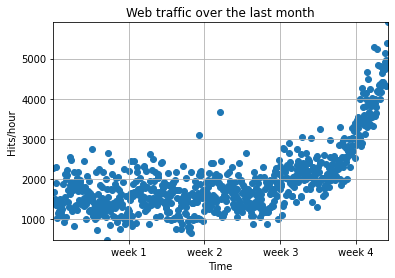

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [60]:
def error(f,x,y):
    return np.sum(f((x)-y)**2)

In [61]:
#starting with simple line 
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


In [62]:
print(residuals)

[3.19531507e+08]


In [63]:
f1=np.poly1d(fp1)
print(error(f1,x,y))

9826356702.747978


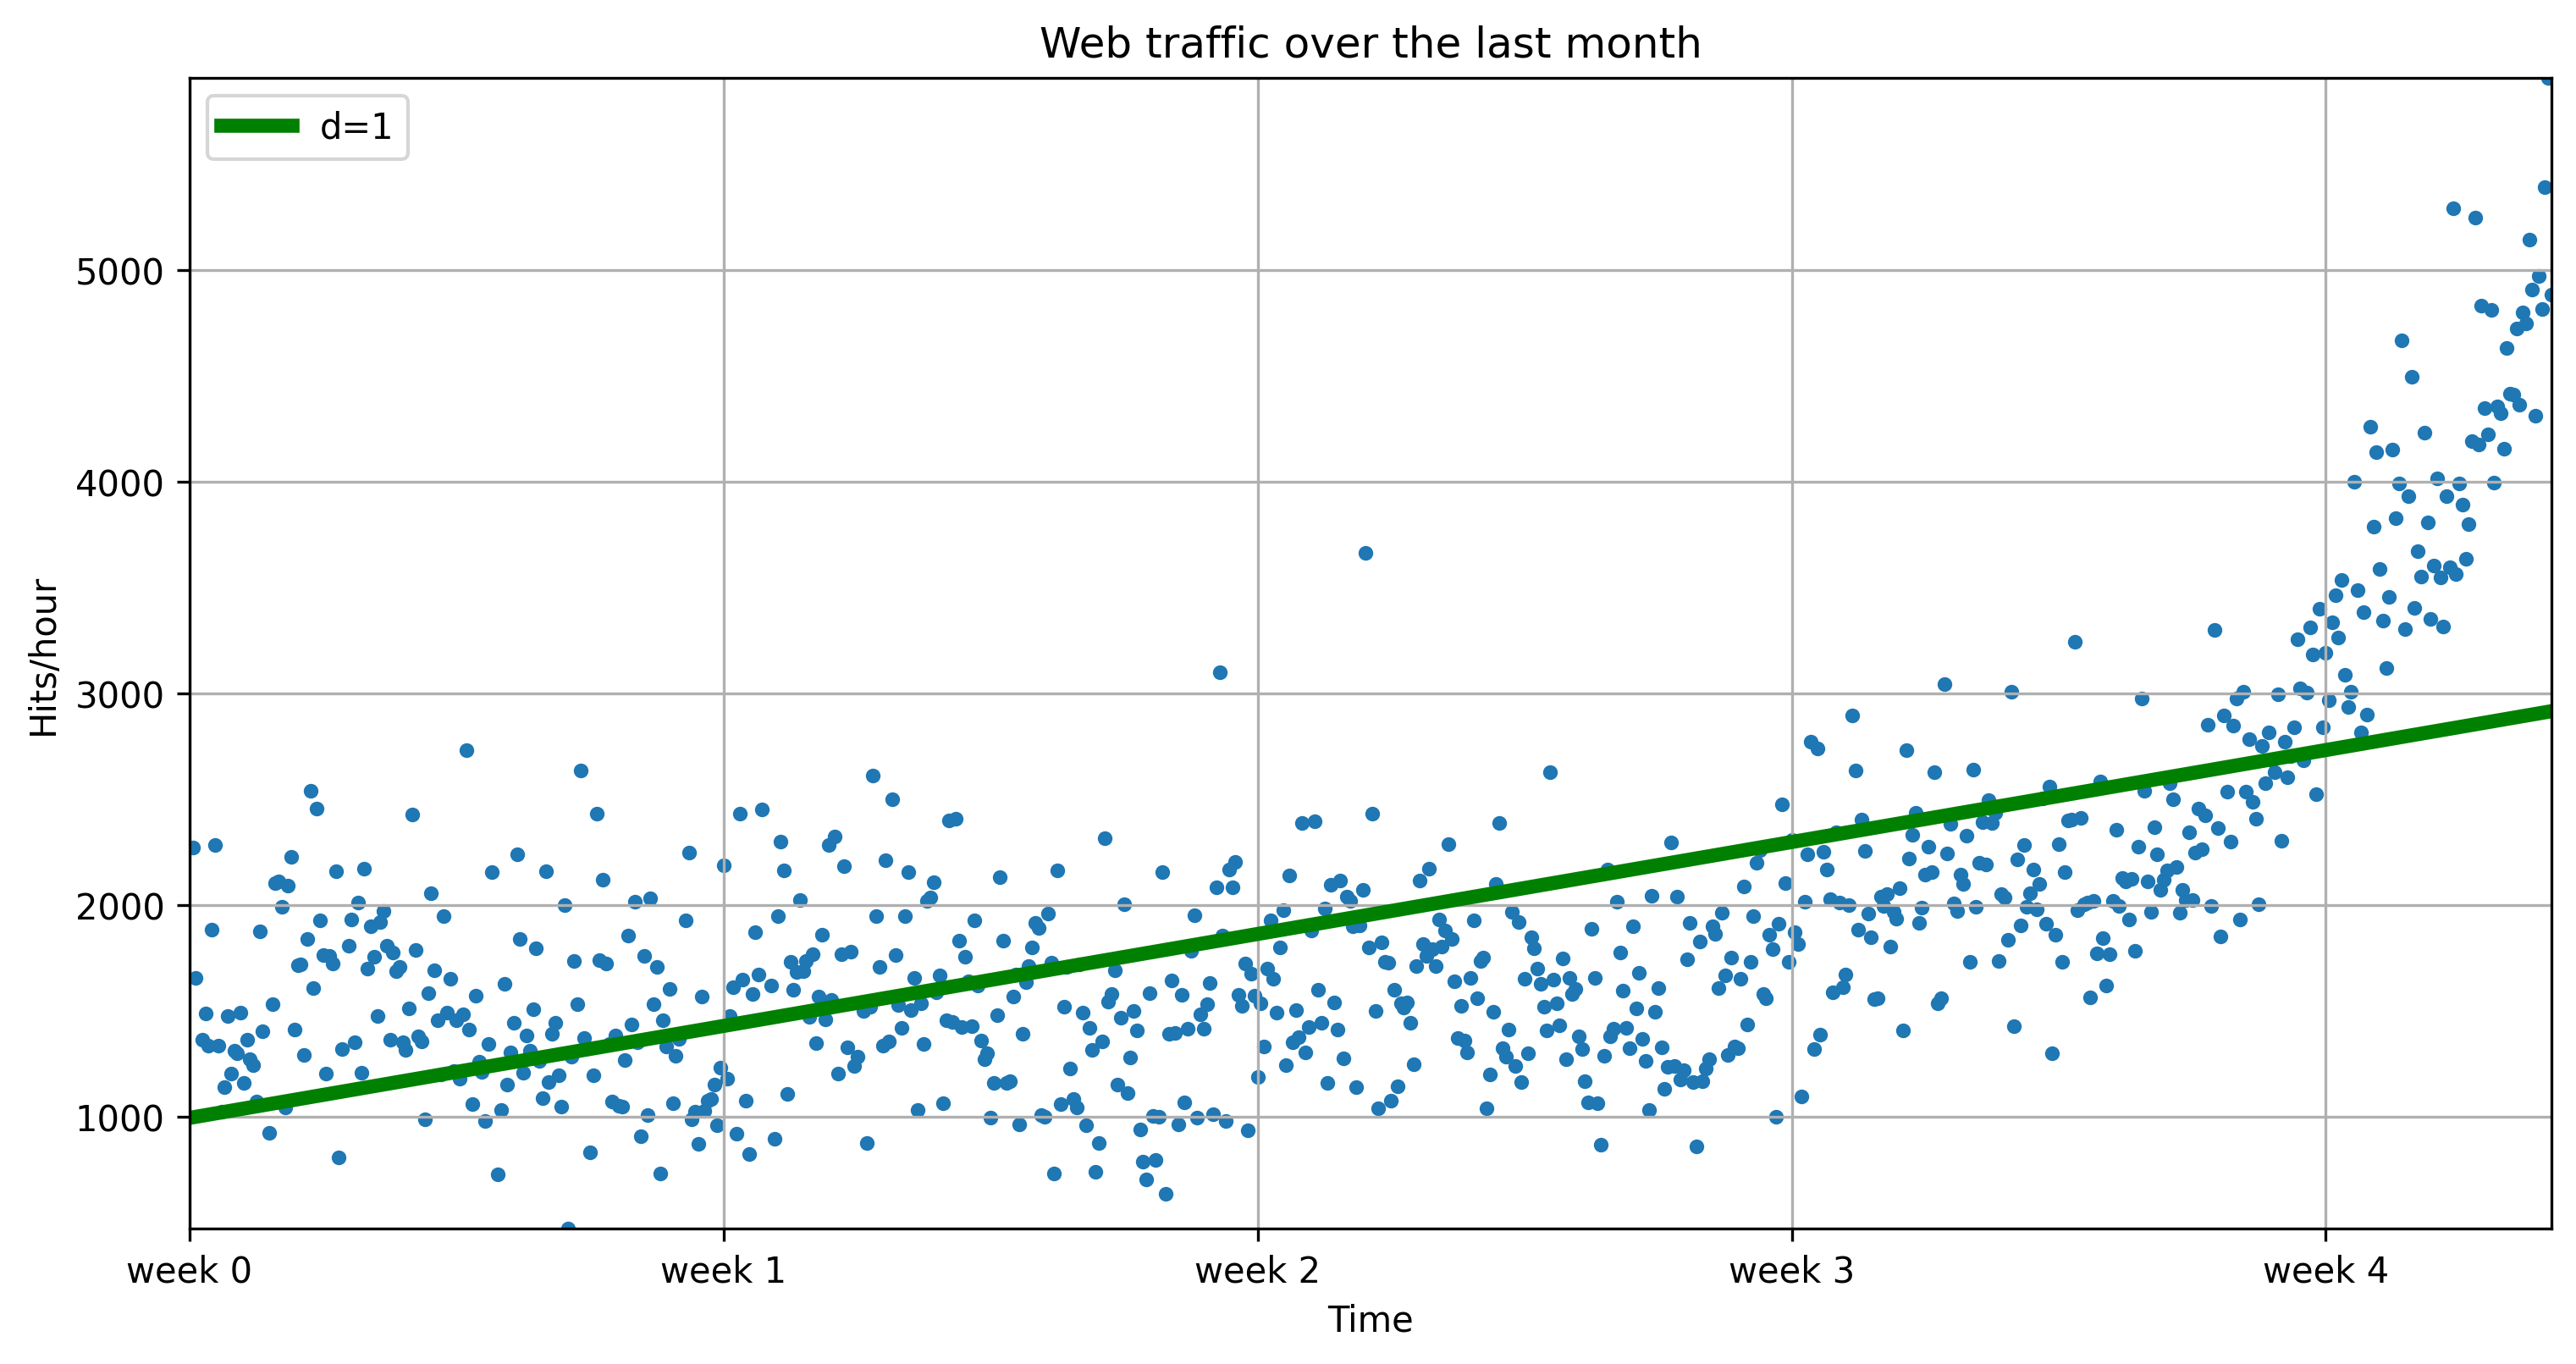

In [83]:
plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx=np.linspace(0,x[-1],1000)
plt.plot(fx,f1(fx), linewidth=4, color="green")
plt.legend(["d=%i" % f1.order], loc="upper left")


In [84]:
f2p= np.polyfit(x,y,2)
print(f2p)
f2=sp.poly1d(f2p)
print(error(f2, x, y))

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]
2483373719553.515


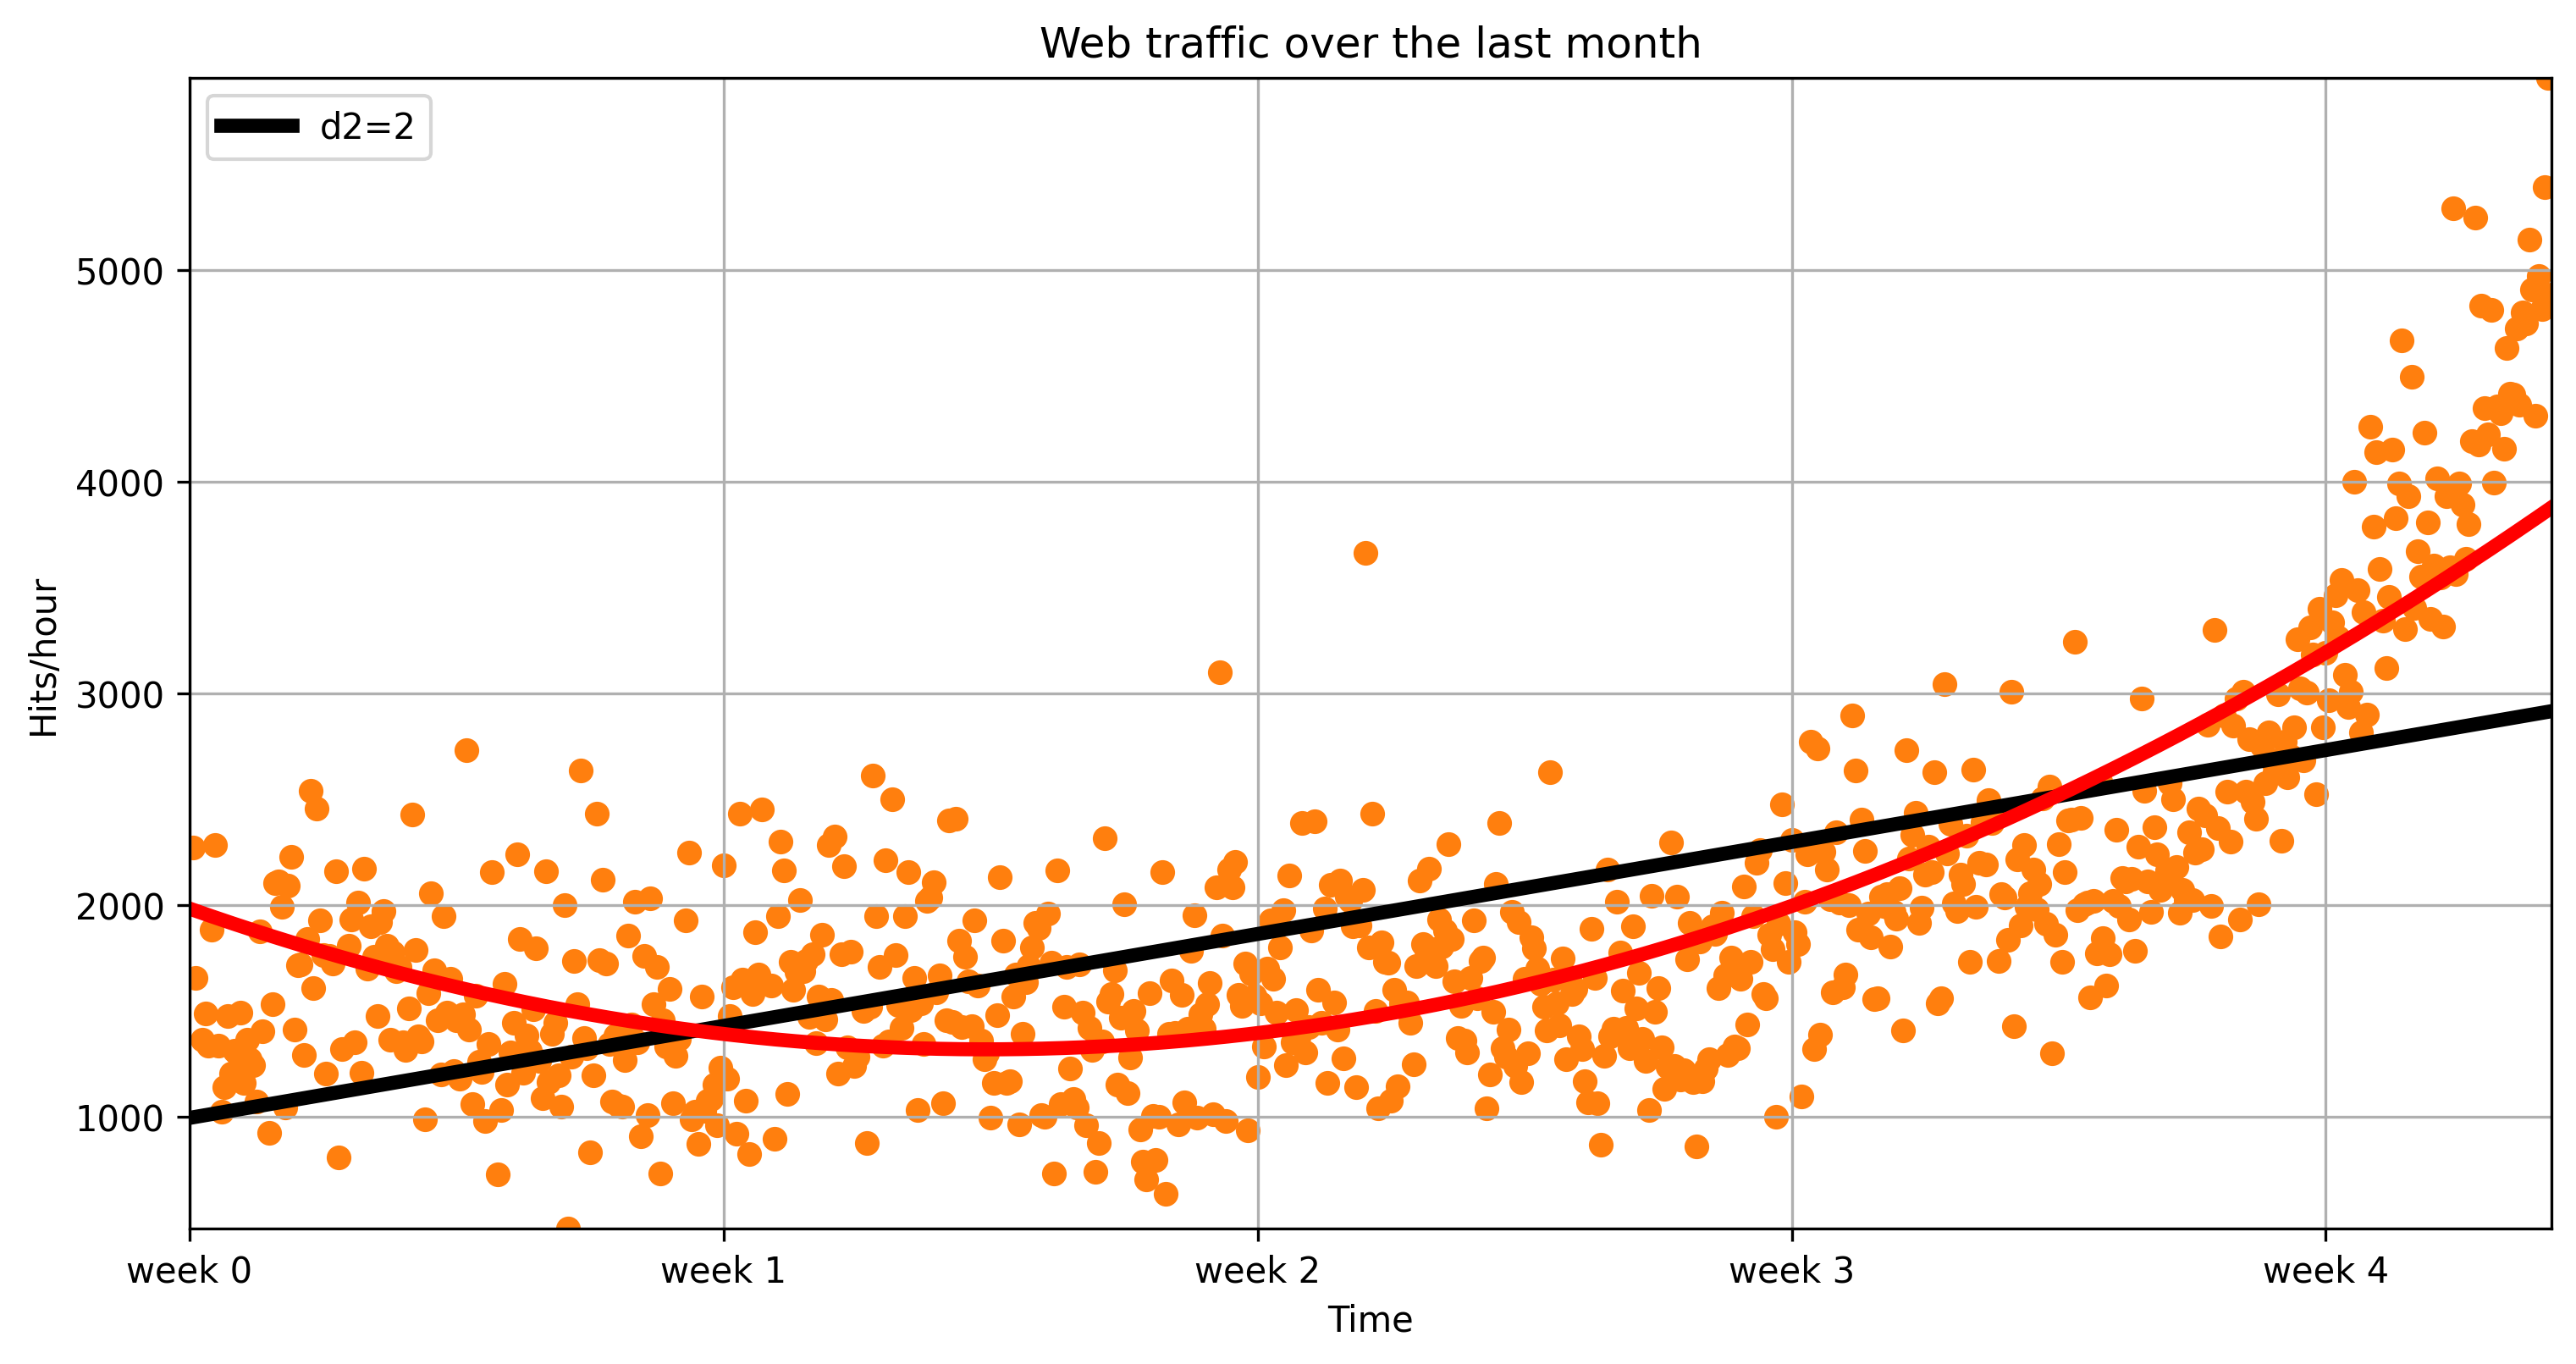

In [96]:
plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
plt.scatter(x, y, s=10)
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx=np.linspace(0,x[-1],1000)
plt.plot(fx,f1(fx), linewidth=4, color="black")
plt.legend(["d1=%i" % f1.order], loc="upper left")
fx=np.linspace(0,x[-1],10000)
plt.plot(fx,f2(fx), linewidth=4, color="red")
plt.legend(["d2=%i" % f2.order], loc="upper left")

In [77]:
f3p= np.polyfit(x,y,3)
print(f3p)
f3=sp.poly1d(f3p)
print(error(f3, x, y))

[ 3.05399378e-05 -2.36080711e-02  4.92276689e+00  1.34264140e+03]
253499352081604.88


In [78]:
f10p= np.polyfit(x,y,10)
print(f10p)
f10=sp.poly1d(f10p)
print(error(f10, x, y))

[-3.56795372e-22  1.29677024e-18 -2.02691211e-15  1.78687320e-12
 -9.78528321e-10  3.44941735e-07 -7.81310594e-05  1.09284671e-02
 -8.55398402e-01  2.98398715e+01  1.31312756e+03]
1.3809633839817614e+32


In [79]:
f100p= np.polyfit(x,y,100)
print(f100p)
f100=sp.poly1d(f100p)
print(error(f100, x, y))

[ 0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -6.21013934e-140
  1.10032659e-136 -3.81622173e-135 -4.27079046e-131 -2.35406100e-128
  1.82580589e-126  1.26401914e-122  1.06803022e-119  4.06247844e-117
 -1.29331603e-114 -3.41075211e-111

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


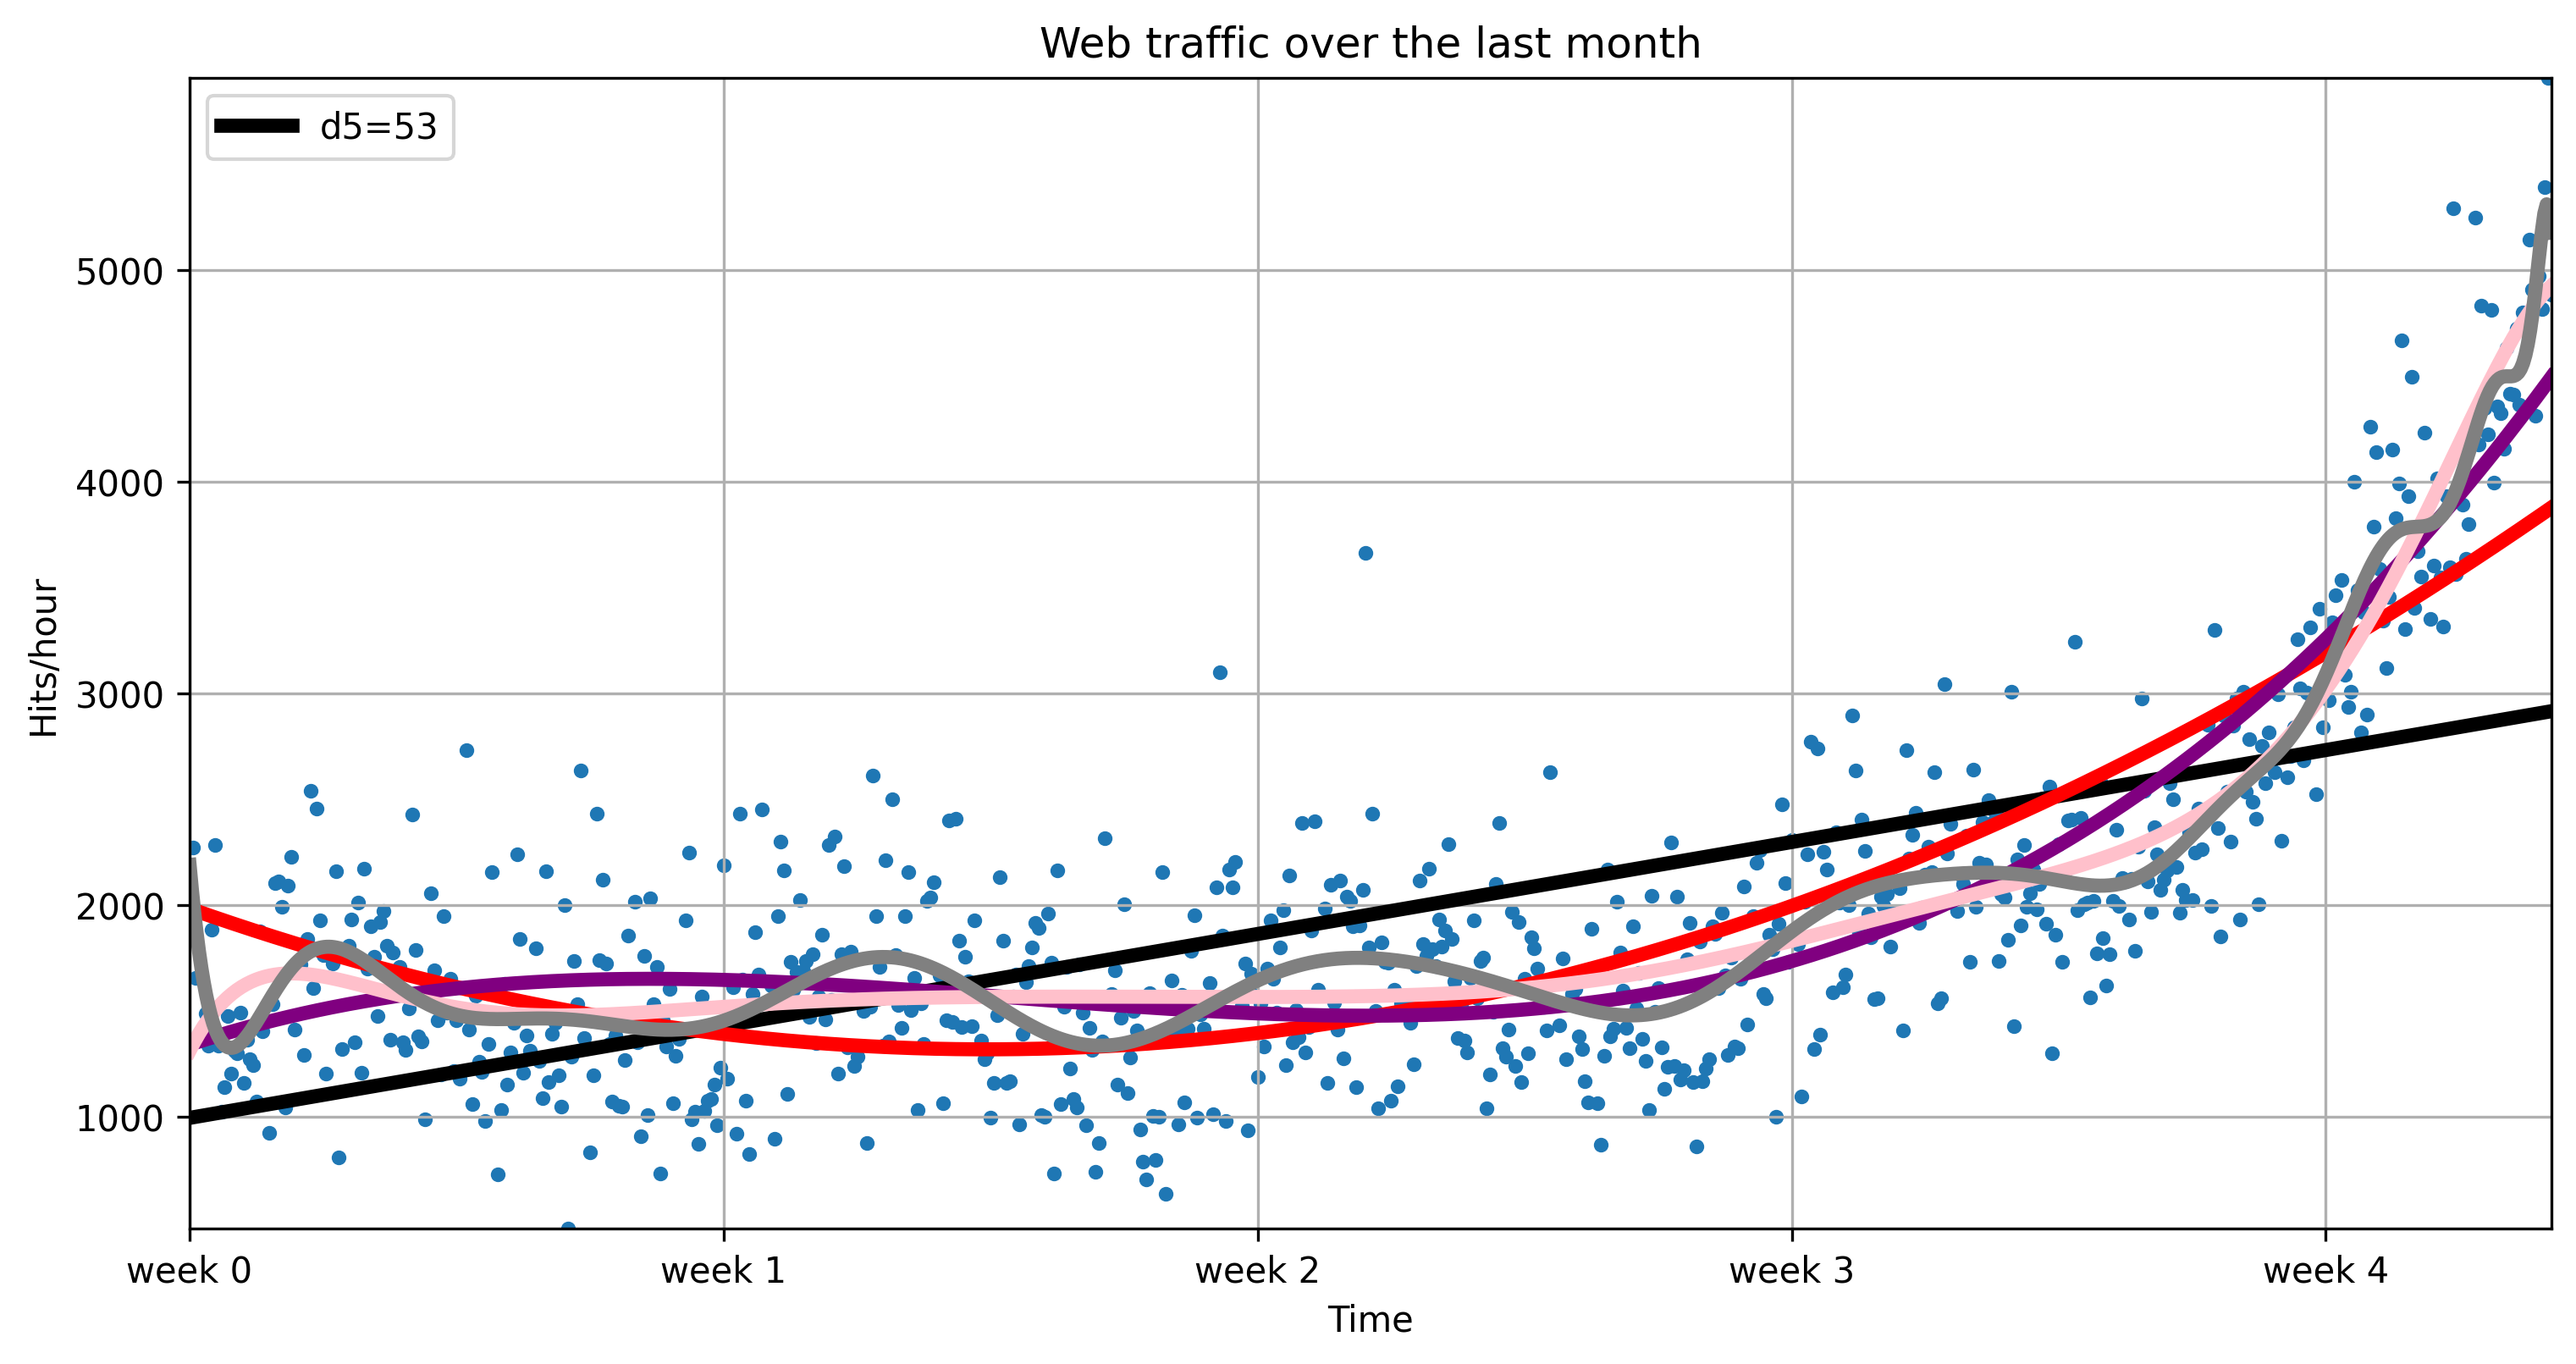

In [97]:
plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx=np.linspace(0,x[-1],1000)
plt.plot(fx,f1(fx), linewidth=4, color="black")
plt.legend(["d1=%i" % f1.order], loc="upper left")
plt.plot(fx,f2(fx), linewidth=4, color="red")
plt.legend(["d2=%i" % f2.order], loc="upper left")
plt.plot(fx,f3(fx), linewidth=4, color="purple")
plt.legend(["d3=%i" % f3.order], loc="upper left")
plt.plot(fx,f10(fx), linewidth=4, color="pink")
plt.legend(["d4=%i" % f10.order], loc="upper left")
plt.plot(fx,f100(fx), linewidth=4, color="grey")
plt.legend(["d5=%i" % f100.order], loc="upper left")

In [81]:
#stepping back to go forward
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=664540244089.556885


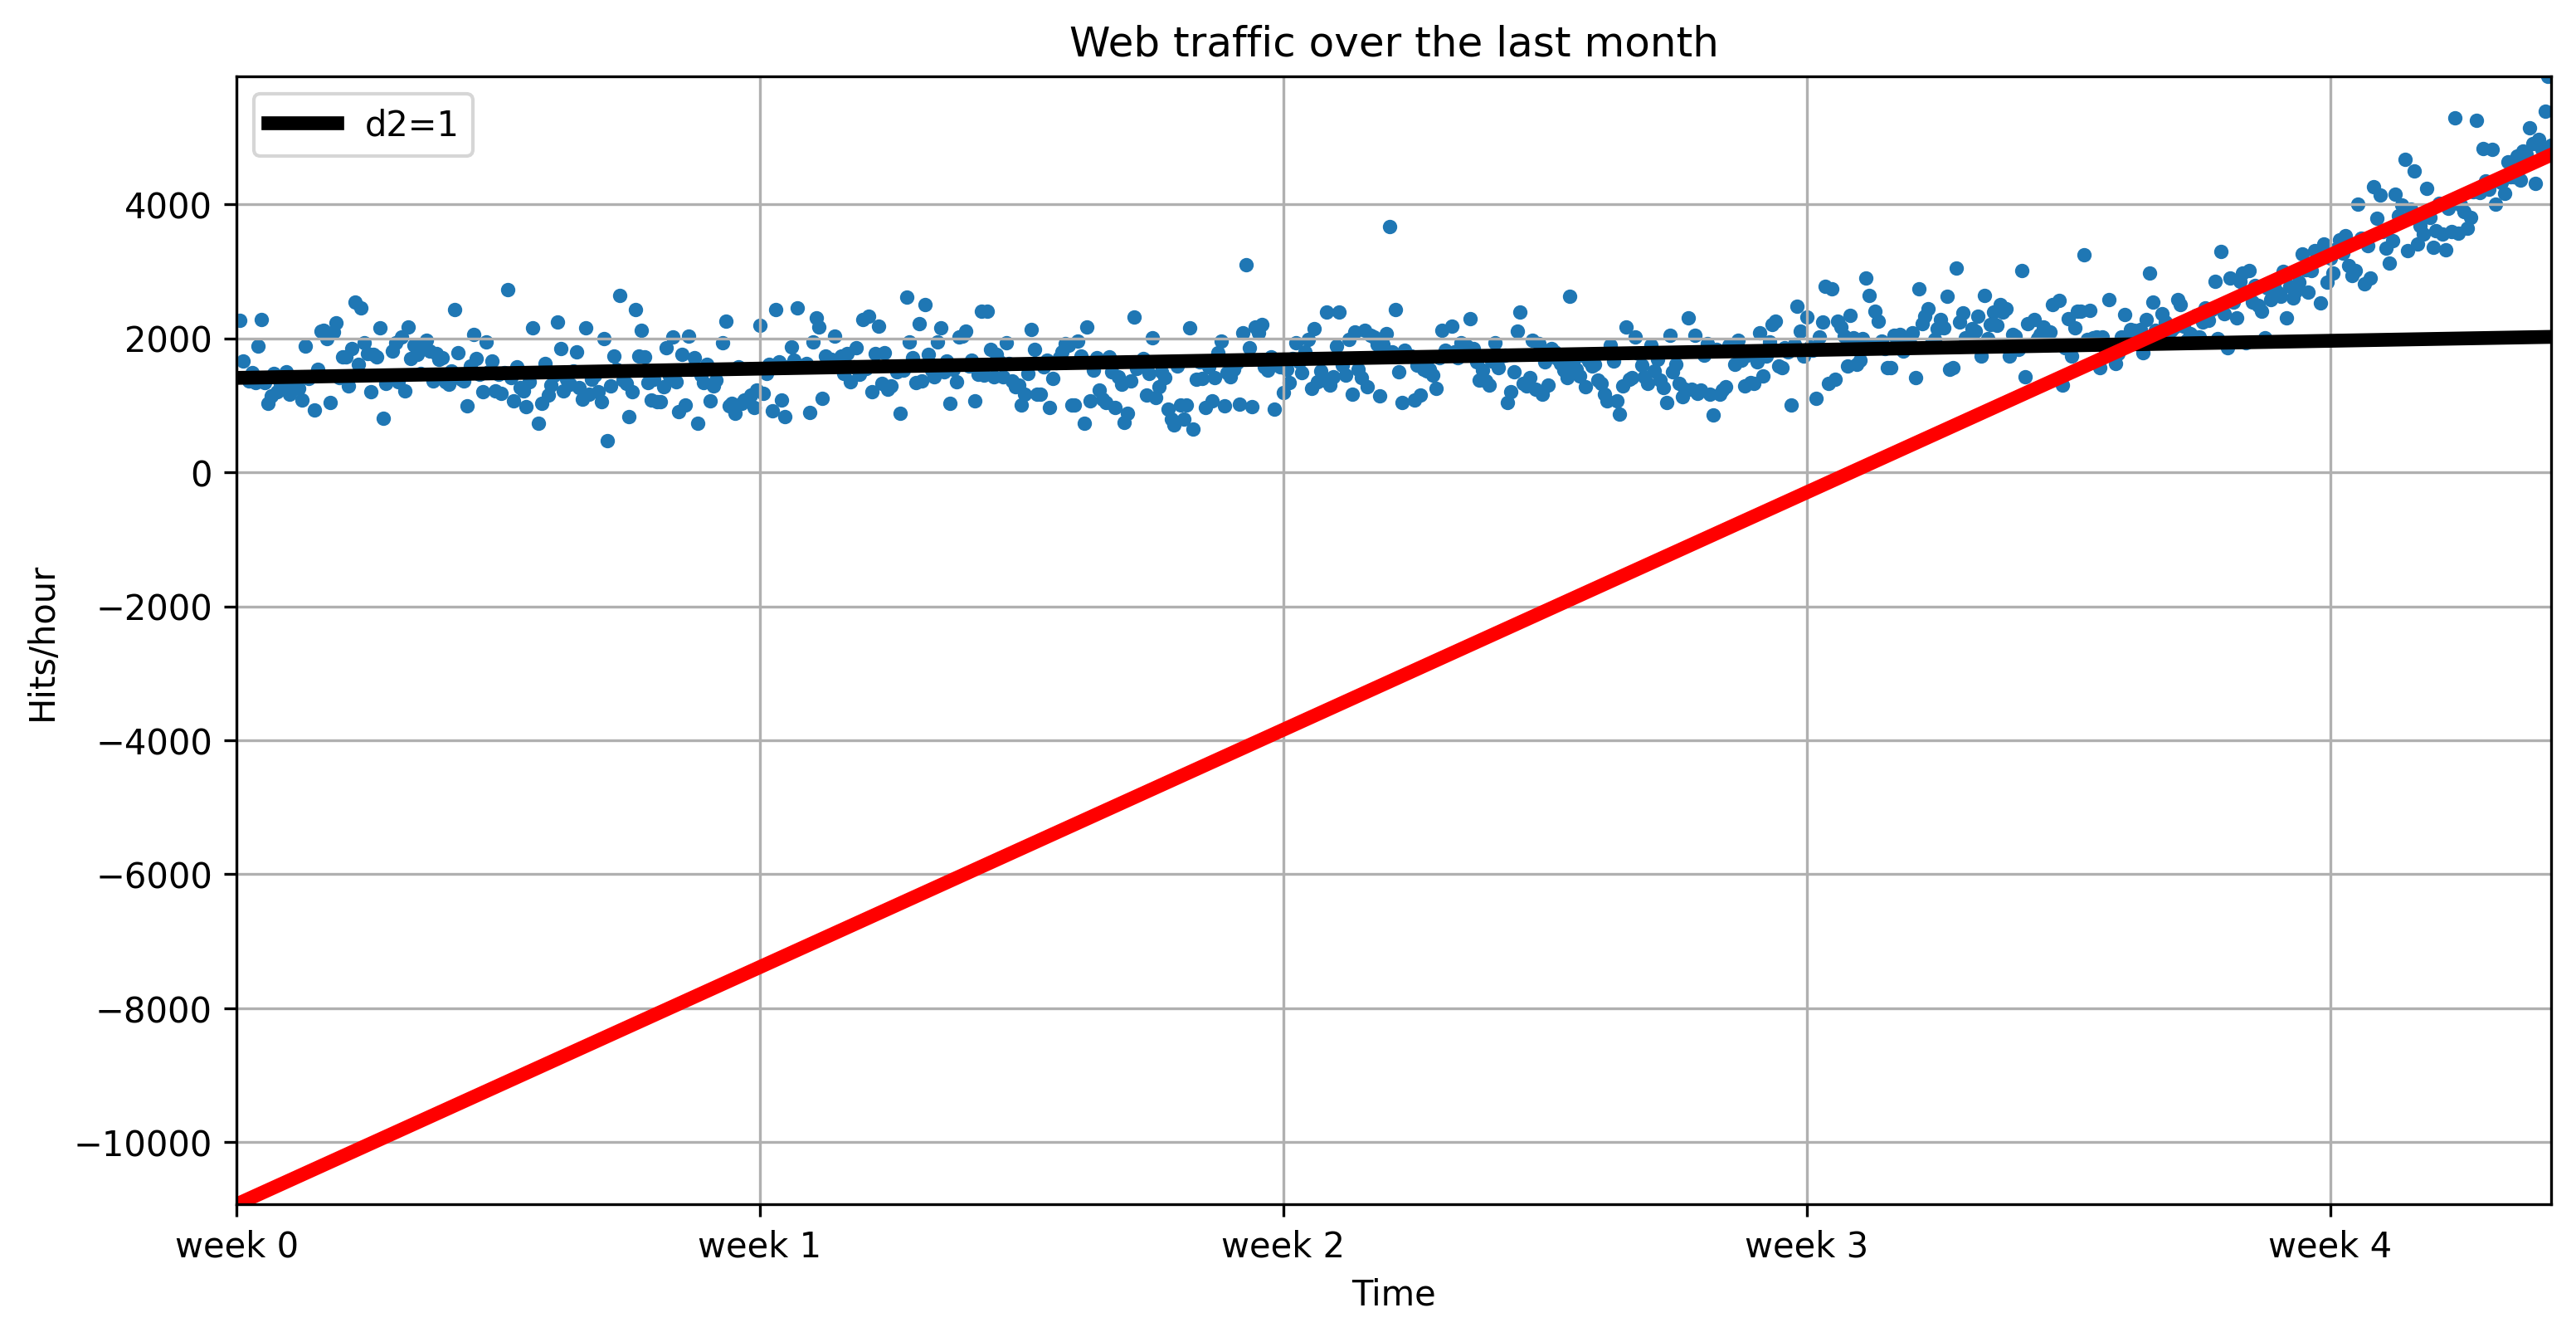

In [109]:
plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx=np.linspace(0,x[-1],1000)
plt.plot(fx,fa(fx), linewidth=4, color="black")
plt.legend(["d1=%i" % fa.order], loc="upper left")
plt.plot(fx,fb(fx), linewidth=4, color="red")
plt.legend(["d2=%i" % fb.order], loc="upper left")